# Florian Guillot : Project 1
### Speed Dating Experiment
### Jedha Full Stack, dsmf-paris-13
### 03-06-2021

### In this analysis, we will explore the dataset **Speed Dating Experiment** [available here](https://www.kaggle.com/annavictoria/speed-dating-experiment)




# **1) Initialization**
----
## **1.1) We begin with the Import of the different libraries we will use and their configurations**
----

In [30]:
# Import the libraries
import pandas as pd
pd.options.display.max_rows = 500 #The dataset will be better displayed with this option
pd.set_option('display.max_columns', None) # We wants to see all the columns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
#classic parameters for the graphs
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (15, 5)
plt.rcParams["xtick.labelsize"] = 9

## **1.2 We gather the data**
----

In [32]:
dataset = pd.read_csv("Speed Dating Data.csv",encoding = 'ISO-8859-1')

# **2)  Exploratory Data Analysis**
---

Important notice : 
   - Each participant can appears multiple time, as one line is for one speed dating of 4 minutes. That's why we will later create a dataset with unique iid, for analytics research
   - Lot of columns have NaN data; to have in mind when we use value_couts, groupby, or other methods


## **2.1) Global dataset overview**
---

In [33]:
# Shape of the dataset
print ("shape of the dataset :", dataset.shape)

shape of the dataset : (8378, 195)


In [34]:
# The dataset with unique iid is called datasetunique for the rest of the analysis
datasetunique = dataset.drop_duplicates(subset=['iid'], keep="first") # We keep only the first apparition of each person (iid)
print("How many unique people have participated : {}\nWhile the original dataset has a lengh of : {}".format(dataset.nunique()[0], dataset.shape[0]))

How many unique people have participated : 551
While the original dataset has a lengh of : 8378


In [35]:
print("The head of the dataset:")
display(dataset.head())

The head of the dataset:


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [36]:
print("The analytics description of the dataset:")
display(dataset.describe())

The analytics description of the dataset:


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,26.358928,7.662488,2.757186,3.784793,3.651645,2

## **2.2) Cleaning the data**
---
### We take the decision to limit the dataset to the columns we will use. NaN value are not significant for our columns, except the column expnum.

In [37]:
mycolumns = ["iid","gender", "age", "race","race_o", "field_cd", "imprace", "imprelig", "samerace", "dec", "expnum", "sports", "tvsports", "exercise", "dining", "museums", "art", "hiking", "gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", "shopping", "yoga"]
notmycolumns = [c for c in dataset.columns if c not in mycolumns]
dataset = dataset.drop(notmycolumns, axis=1) #We drop useless columns

### A quick overview of the NaN values in our dataset:

In [38]:
dataset.isnull().sum()

iid            0
gender         0
samerace       0
race_o        73
age           95
field_cd      82
race          63
imprace       79
imprelig      79
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      79
reading       79
tv            79
theater       79
movies        79
concerts      79
music         79
shopping      79
yoga          79
expnum      6578
dec            0
dtype: int64

### We transform the categorical data with their true names in order to have understandible data. 
One importance notice : for the importance of the religion and race improtances, we will transform the scale 0 to 10 to: Not important, Important and  Very important



In [39]:
# gender
dataset['gender'] = dataset.gender.map({1 : 'Male', 0 : 'Female'})

# race
dataset['race'] = dataset.race.map({1: 'Black', 2: 'White', 3: 'Hispanic', 4: 'Asian', 6: 'Other'})

# race of the partner
dataset['race_o'] = dataset.race_o.map({1: 'Black', 2: 'White', 3: 'Hispanic', 4: 'Asian', 6: 'Other'})

# filed studied
dataset['field_cd'] = dataset.field_cd.map({1: 'Law', 2: 'Math', 3: 'Soc. Sc.', 4: 'Med. Sc.', 5: 'Eng.', 6: 'Journ.', 7: 'Hist.', 8: 'Econ', 9: 'Educ.', 10: 'Nat. Sc.', 11: 'Soc. Wr.', 12: 'Und.', 13: 'Pol. Sc.',
14: 'Film', 15: 'Arts', 16:'Lang.', 17: 'Arch.', 18: 'Oth.'})

# importance of the race
dataset['imprace'] = dataset.imprace.map({0: 'Not important', 1: 'Not important', 2: 'Not important', 3: 'Not important', 4: 'Not important',
5: 'Not important', 6: 'Important', 7: 'Important', 8: 'Important', 9: 'Very important', 10: 'Very important'})

# importance of the religion
dataset['imprelig'] = dataset.imprelig.map({0: 'Not important', 1: 'Not important', 2: 'Not important', 3: 'Not important', 4: 'Not important', 5: 'Not important', 6: 'Important', 7: 'Important', 8: 'Important', 9: 'Very important', 10: 'Very important'})

# are the two people of the same race
dataset['samerace'] = dataset.samerace.map({1 : 'yes', 0 : 'no'})

# decision after the speeedating
dataset['dec'] = dataset.dec.map({1 : 'yes', 0 : 'no'})

Here is the look of the new dataset :

In [40]:
dataset.head()

,iid,gender,samerace,race_o,age,field_cd,race,imprace,imprelig,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,expnum,dec
0,1,Female,no,White,21.0,Law,Asian,Not important,Not important,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,2.0,yes
1,1,Female,no,White,21.0,Law,Asian,Not important,Not important,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,2.0,yes
2,1,Female,yes,Asian,21.0,Law,Asian,Not important,Not important,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,2.0,yes
3,1,Female,no,White,21.0,Law,Asian,Not important,Not important,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,2.0,yes
4,1,Female,no,Hispanic,21.0,Law,Asian,Not important,Not important,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,2.0,yes


### In order to fit the reality, we create a second dataset where we keep only the first registered entry for one person (i.e : 551 people)


In [41]:
datasetunique = dataset.drop_duplicates(subset=['iid'], keep="first").copy()

## **2.3) Exploring who are the different people in this study**

---

We begin with basic representations: age, gender, race

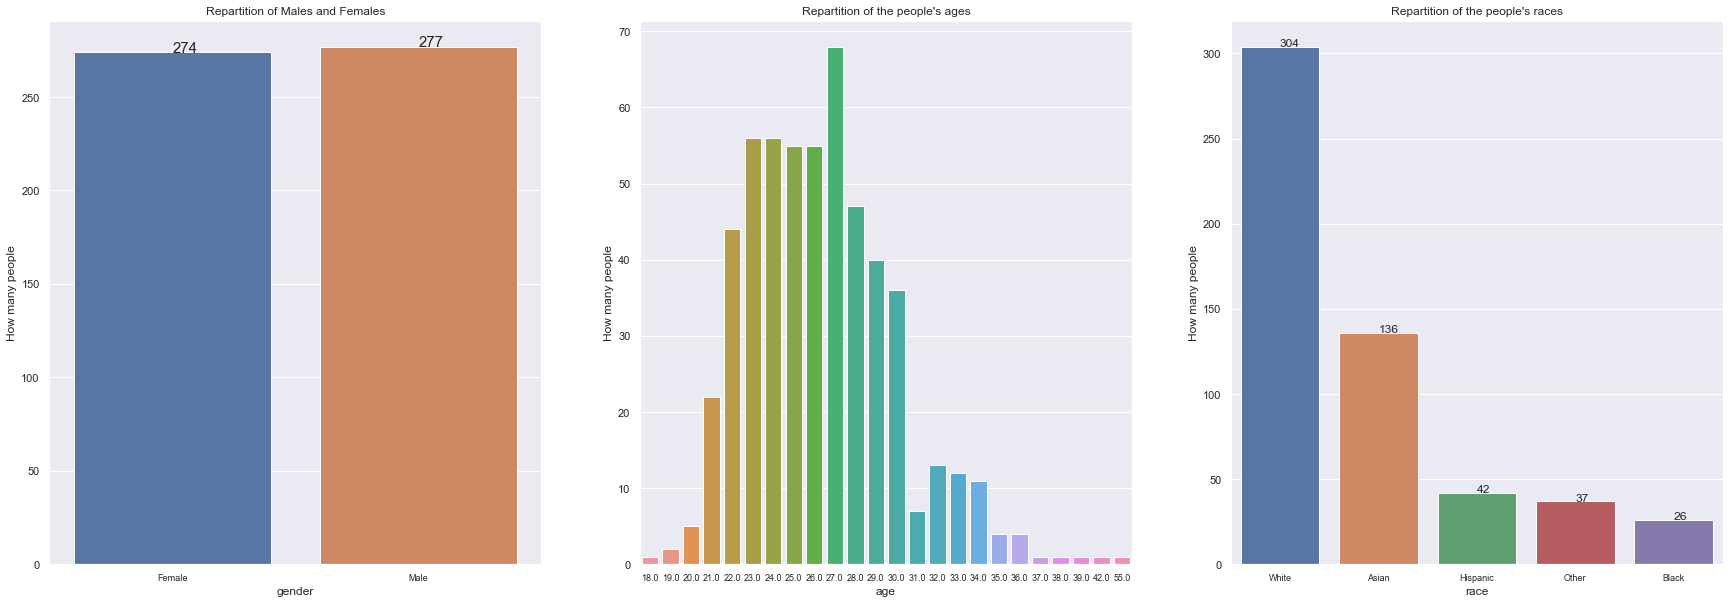

In [42]:
plt.figure(figsize=(30,10))

# First chart : gender
plt.subplot(131) 
ax1 = sns.countplot(x = datasetunique["gender"]);
ax1.set_ylabel("How many people")
ax1.set_title("Repartition of Males and Females")
for i in ax1.patches: #loop to print value of people on top of the bars
    ax1.text(i.get_x() +0.40, i.get_height()+0.08,str(round((i.get_height()), 1)),fontsize = 15)

# Second chart : age 
plt.subplot(132)
ax2 = sns.countplot(x = datasetunique["age"]);
ax2.set_ylabel("How many people")
ax2.set_title("Repartition of the people's ages")

# Third chart : race
plt.subplot(133) 
ax3 = sns.countplot(x = datasetunique["race"], 
                    order = ["White", "Asian", "Hispanic", "Other", "Black"]);
ax3.set_ylabel("How many people")
ax3.set_title("Repartition of the people's races")
for i in ax3.patches: #loop to print value of people on top of the bars
    ax3.text(i.get_x() +0.40, i.get_height()+0.08,str(round((i.get_height()), 1)),fontsize = 12)

plt.show();

### We can see that 
#### - The dataset is well balanced between males and females
#### - Most of the participants are white
#### - Most of the people are between 21 and 30 years old

---

Let's have a look at the main field study of our sample

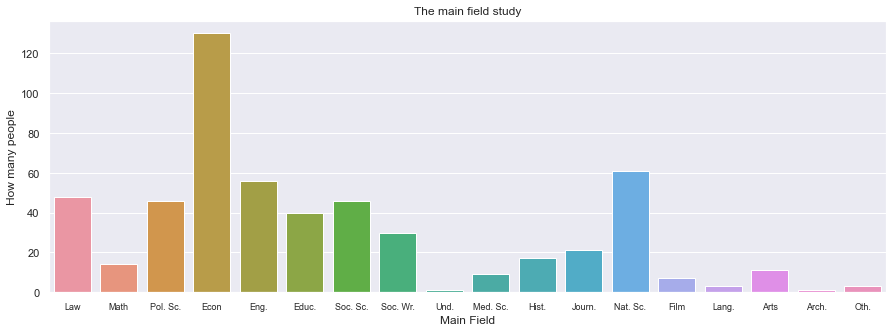

In [43]:
ax1 = sns.countplot(x = datasetunique["field_cd"]);
ax1.set_title("The main field study")
ax1.set_ylabel("How many people")
ax1.set_xlabel("Main Field")
plt.show;

### Let's visualize this data but ordered by gender

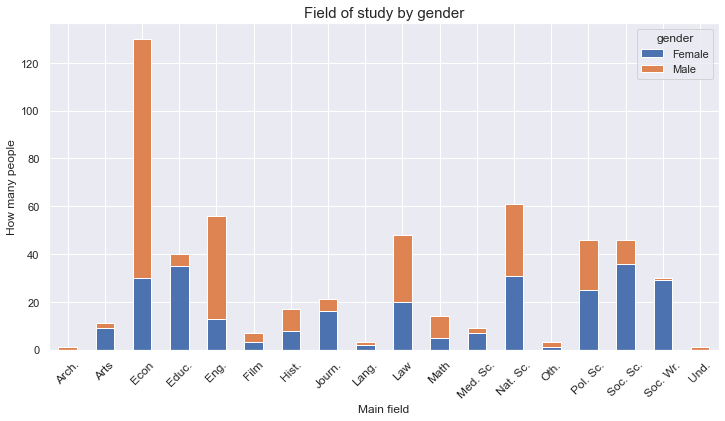

In [44]:
# We create a temporary dataset grouped by field and gender, apply size, and unstack it. We will have Field as lines and Gender as columns
tempd_d = datasetunique[['gender', 'field_cd']].groupby(['field_cd', 'gender']).size().unstack()

ax = tempd_d.plot(kind='bar', 
                    figsize=(12,6), 
                    stacked=True)
ax.set_xticklabels(ax.get_xticklabels(), 
                    fontsize=12, 
                    rotation=45)
ax.set_title('Field of study by gender', fontsize=15)
ax.set_xlabel('Main field',fontsize=12)
ax.set_ylabel('How many people',fontsize=12)
plt.show;

Same chart but with the race view

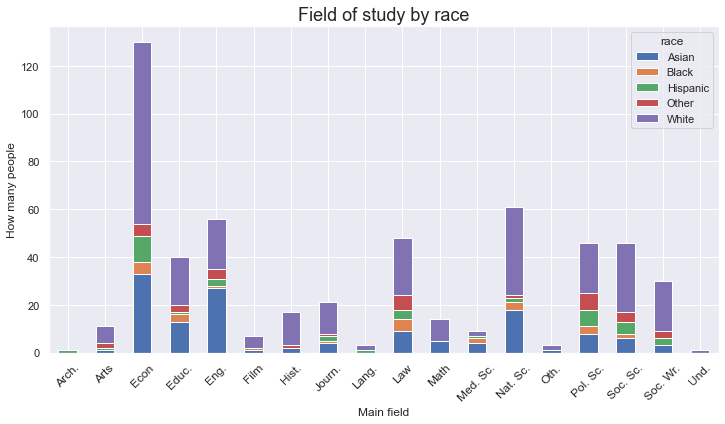

In [45]:
temp_d = datasetunique[['race', 'field_cd']].groupby(['field_cd', 'race']).size().unstack()
ax = temp_d.plot(kind='bar', 
                figsize=(12,6), 
                stacked=True)
ax.set_xticklabels(ax.get_xticklabels(), 
                    fontsize=12, 
                    rotation=45)
ax.set_title('Field of study by race', fontsize=18)
ax.set_xlabel('Main field',fontsize=12)
ax.set_ylabel('How many people',fontsize=12)
plt.show;

### We have seen that the mean student is a white person aged 27, we can now add that this person is a man and studies Economics

---

### In order to check what is important in the dating world for our sample, we create a simplified dataset ant then use the method "melt" in order to check the different interests by race

In [46]:
# We gather all the columns relative to interests
interests_columns = ["sports", "tvsports", "exercise", "dining", "museums", "art", "hiking", "gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", "shopping", "yoga"]

# And create the exhaustive list of columns not relative to interestes
simplified_columns = [y for y in dataset.columns if y not in interests_columns]

# With melted method, we melt all the columns not signaled as one, here we melt all the columns related to interests
melted_data = pd.melt(datasetunique, simplified_columns, var_name='interest')
melted_data = melted_data.rename(columns={'value' : 'vote'})

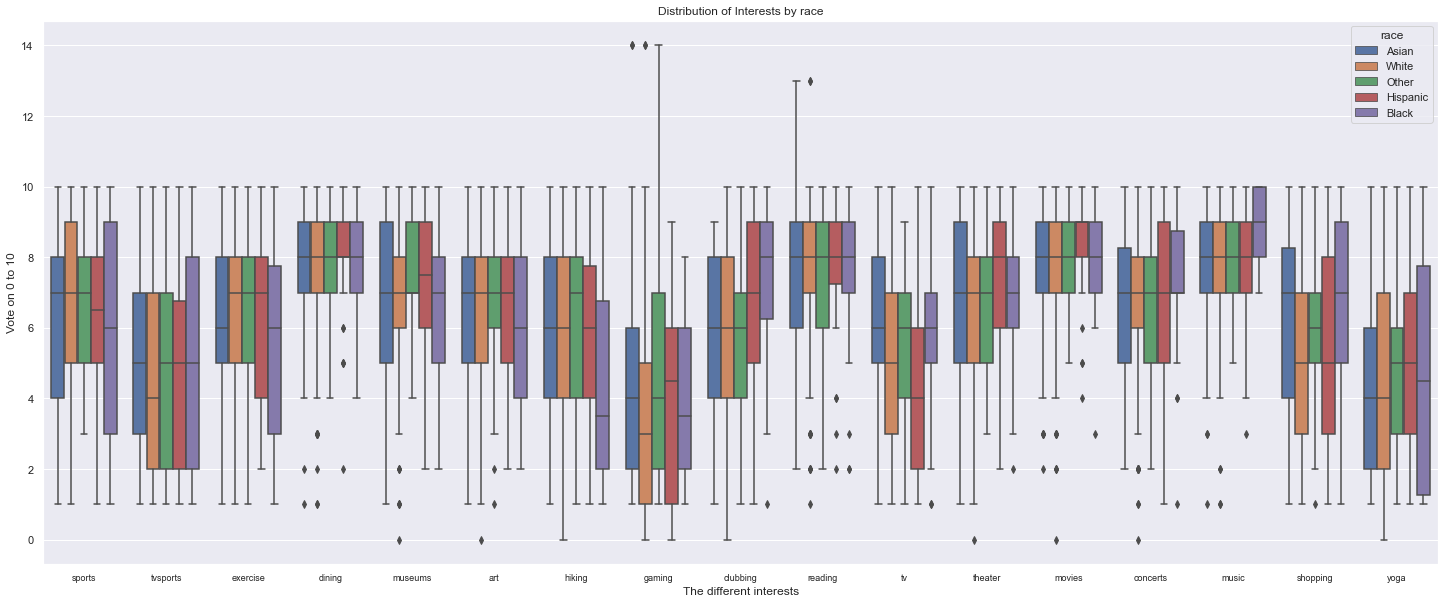

In [47]:
# Using this data we can create a chart with the different interests depending on the race
plt.figure(figsize=(25,10))
ax = sns.boxplot(x='interest', 
                    y='vote', 
                    data=melted_data, 
                    hue = 'race');
ax.set (ylabel="Vote on 0 to 10", 
        title ="Distribution of Interests by race", 
        xlabel = "The different interests" )
plt.show();

Another way to see the different interests by race is to plot one chart by race. Let's try that

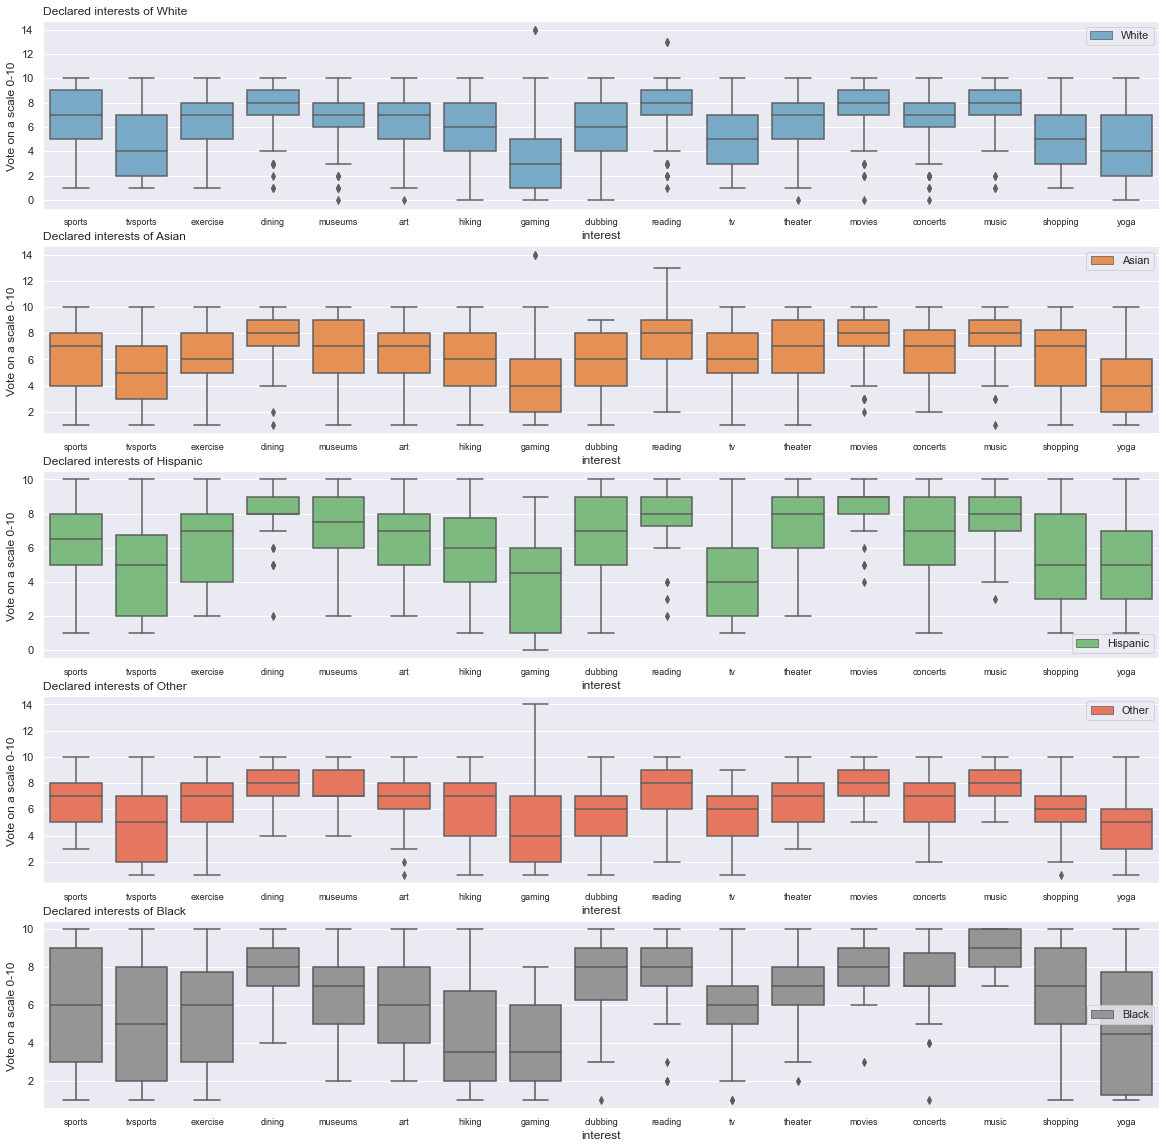

In [48]:
plt.figure(figsize=(20,20))
colors = ["Blues","Oranges","Greens","Reds","Greys"] #The different colours we will use

for i_color, race in enumerate(datasetunique["race"].value_counts().index): # We loop on all the known race (not the NaN)
    plt.subplot(int(str(51) + str(i_color+1))) # Number for the subplot method
    ax = sns.boxplot(x='interest', 
                    y='vote', 
                    data = melted_data.loc[melted_data["race"]==race], 
                    hue = 'race', 
                    palette=colors[i_color],
                    )
    ax.set_title("Declared interests of "+ race, loc="left")
    ax.set_ylabel("Vote on a scale 0-10 ")
    plt.legend()

plt.show();

### Some inputs from these two graphs : 

- Everybody is well aligned on interests if we take the race angle
- Movies, music and reading are often in the top
- Gaming and yoga are quite at the bottom, but yoga is controversial
- One thing is sure : music is the top interest for black people

---

# **3) Focus on the race & religion features**
---
As an importance odd, the importance of the religion is the same kind of data than the importance of the race. We will analize the two data at the beginning

We begin with the importances of the religion and the race in the eyes of each race

In [49]:
print("The tabs with the importance of races for everybody:")
display(datasetunique["imprace"].value_counts(normalize = True))

The tabs with the importance of races for everybody:


Not important     0.718750
Important         0.204044
Very important    0.077206
Name: imprace, dtype: float64

In [50]:
print("The tabs with the importance of religions for everybody:")
display( datasetunique["imprelig"].value_counts(normalize = True) )

The tabs with the importance of religions for everybody:


Not important     0.742647
Important         0.187500
Very important    0.069853
Name: imprelig, dtype: float64

Now we will visualize these tabs using the two columns of our dataset : imprace and impreligion 

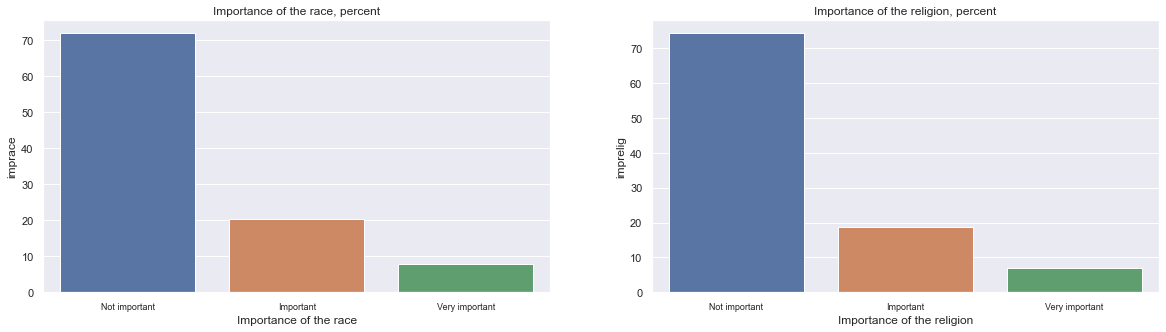

In [51]:
plt.figure(figsize=(20,5))

# First chart
plt.subplot(121)
values = datasetunique["imprace"].value_counts(normalize=True).mul(100)
ax1 = sns.barplot(x = datasetunique["imprace"].value_counts().index, 
                    y = values, 
                    order=["Not important","Important","Very important"]);
ax1.set(title = 'Importance of the race, percent', xlabel = 'Importance of the race')


# Second chart
plt.subplot(122)
values = datasetunique["imprelig"].value_counts(normalize=True).mul(100)
ax1 = sns.barplot(x = datasetunique["imprelig"].value_counts().index, 
                    y = values, 
                    order=["Not important","Important","Very important"]);
ax1.set(title = 'Importance of the religion, percent', xlabel = 'Importance of the religion')

plt.show();

### More than 70% of the people studied say race in not Important. We can ask oursleves of the people with an importance on one topic has the same level of importance for the other
---

We create a dictionnary of how many people have the same importance level for religion and race

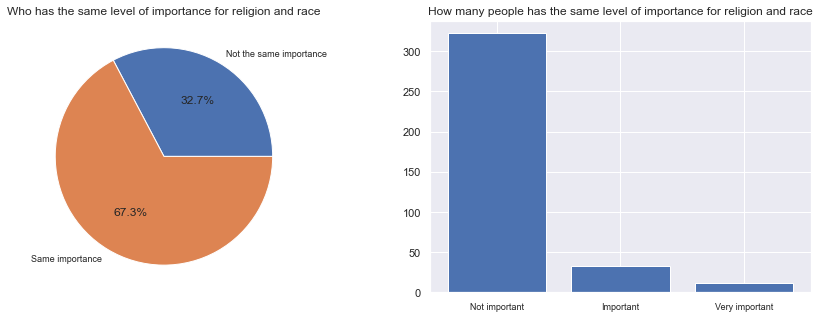

In [52]:
same={} 
for i in ["Not important","Important","Very important"]:
    mask = (datasetunique["imprace"] == i) & (datasetunique["imprelig"] == i)
    same[i] = datasetunique.loc[mask,['imprace','imprelig']].shape[0]

plt.figure(figsize=(15,5))

#First chart
ax1 = plt.subplot(121)
patches, texts, autotexts = ax1.pie([datasetunique[["imprelig"]].isnull().value_counts()[0] - sum(same.values()), sum(same.values())], 
                            autopct='%1.1f%%', 
                            labels = ["Not the same importance", "Same importance"],
                            );
ax1.set(title = "Who has the same level of importance for religion and race")

#Second chart
ax2 = plt.subplot(122)
patches, texts, autotexts = ax2.bar(["Not important","Important","Very important"], same.values())
ax2.set(title = "How many people has the same level of importance for religion and race")
plt.show();

We can go deeper in this topic by looking at the race importance for the different races. We see below two charts with the normalized percentage of people by race. It means that if you sum all the bars for one race, you will have 100%

<Figure size 1080x360 with 0 Axes>

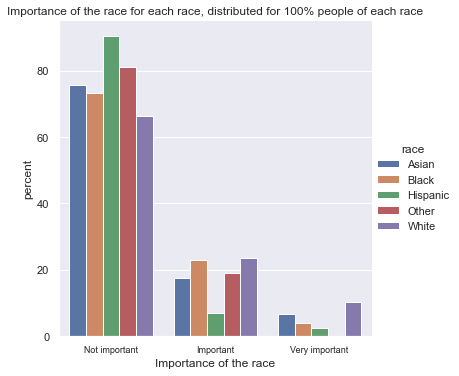

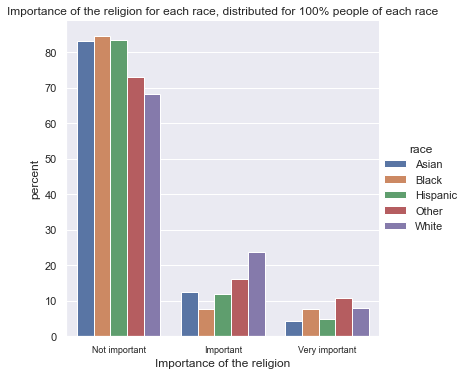

In [53]:
plt.figure(figsize=(15,5))
# First chart
d3 = datasetunique.groupby("race")['imprace'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
ax3 = sns.catplot( x="imprace",
                    y='percent',
                    data = d3, 
                    hue="race",
                    kind='bar');
ax3.set(title = "Importance of the race for each race, distributed for 100% people of each race",
        xlabel = "Importance of the race")

# Second chart
d4 = datasetunique.groupby("race")['imprelig'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
ax4 = sns.catplot( x="imprelig",
                    y='percent',
                    data = d4, 
                    hue="race",
                    kind='bar');
ax4.set(title = "Importance of the religion for each race, distributed for 100% people of each race",
        xlabel = "Importance of the religion")

plt.show();

### For the religion, Hispanics are more than 90% to say Race is not important, but it's only 75% for the Black people. Nevertheless, for the religion they quite agree at more arounf 85% that is is not very important. 

----

Let's see some figures about the important of the race, by gender and by race

In [54]:
dataset[['race', 'gender', 'imprace']].groupby(['race', 'gender', 'imprace']).size().unstack().fillna(0)

imprace          Important  Not important  Very important
race     gender                                          
Asian    Female      181.0          770.0            94.0
         Male        177.0          699.0            61.0
Black    Female       63.0          157.0            21.0
         Male         21.0          158.0             0.0
Hispanic Female       38.0          345.0            20.0
         Male         20.0          241.0             0.0
Other    Female       64.0          181.0             0.0
         Male         38.0          239.0             0.0
White    Female      447.0         1384.0           360.0
         Male        681.0         1736.0           103.0

### If the repartition of "Not important" has small variations, we can see that for hispanic people and black people, 0 man has said the race is very important, but 20 women did in each case

---

Now that we see how race is important, we can switch to a very interesting data : how many Yes does people expect, ordered by race

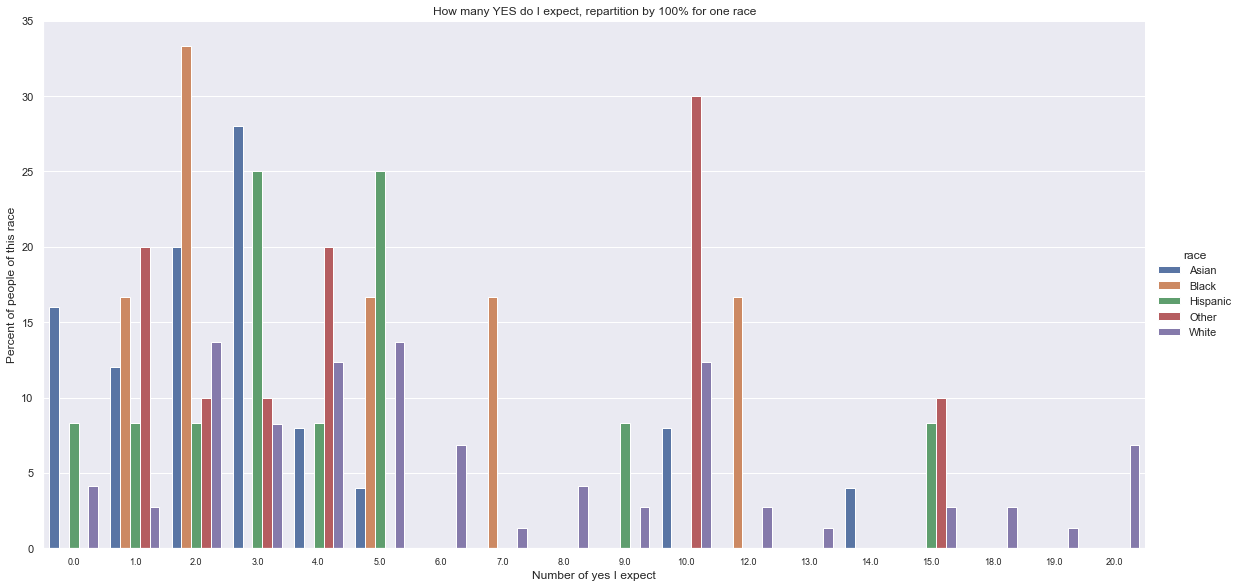

In [55]:

d5 = datasetunique.groupby("race")['expnum'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

ax = sns.catplot( x="expnum",
                    y='percent',
                    data = d5, 
                    hue="race",
                    kind='bar',
                    height=8,
                    aspect=2,
                    )
ax.set(title="How many YES do I expect, repartition by 100% for one race", xlabel="Number of yes I expect", ylabel="Percent of people of this race")
plt.show;

### There are 22 waves of speed dating, It's pretty clear that White people expect more than the others, while Asian ones do not expect quite much form this experiment

---

We will now compare the decisions after a speed dating and compare it while focusing on the races on both of the participants

For each race, for all the speedating reports where the person said YES, repartition of yes-speedatings where a race said yes to another race


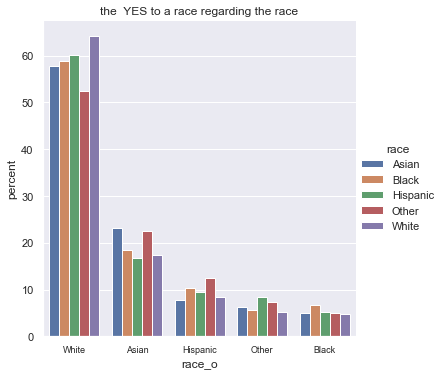


For each race, for all the speedating reports where the person said yes who said NO, repartition of no-speedatings where a race said no to another race


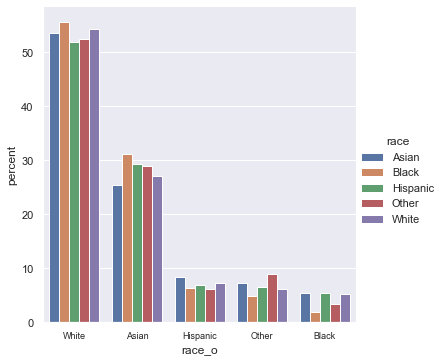

In [56]:
# We create two masks, helping us to cut our data to "only speedating with yes decision" and "only speedating with no decision"

cut_data_yes = dataset[dataset['dec'] == "yes"]
cut_data_no  = dataset[dataset['dec'] == "no"]

# Graph for the yes, normalized
print("For each race, for all the speedating reports where the person said YES, repartition of yes-speedatings where a race said yes to another race")
d1 = cut_data_yes.groupby("race")['race_o'] \
                                    .value_counts(normalize=True) \
                                    .mul(100) \
                                    .rename('percent') \
                                    .reset_index()
ax1 = sns.catplot( x="race_o",
                    y='percent',
                    data = d1, 
                    hue="race",
                    kind='bar');
ax1.set(title = "the  YES to a race regarding the race")
plt.show();

# Graph for the no, normalized
print("\nFor each race, for all the speedating reports where the person said yes who said NO, repartition of no-speedatings where a race said no to another race")
d2 = cut_data_no.groupby("race")['race_o'] \
                    .value_counts(normalize=True) \
                    .mul(100) \
                    .rename('percent') \
                    .reset_index()
ax2 = sns.catplot( x="race_o",
                    y='percent',
                    data = d2, 
                    hue="race",
                    kind='bar');
ax1.set(title = "the  NO to a race regarding the race")
plt.show();

How to read those graphs : for all the experiences where a white person said yes, 60%+ of the experiments where with a white person in front 
### We can conclude for instance that a white persone tends more to the No than to the Yes when the partner is black

---

**Finally** we can look at the repartition of the decision results, by race and by gender

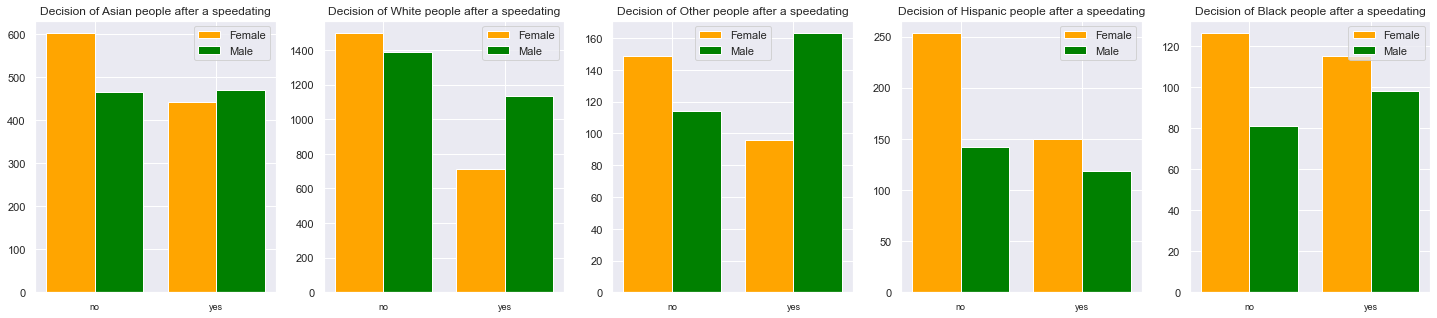

In [57]:
# We gonna loop on all the races and display, for each race, the decision after the speedating separated with the gender

i=1 # This incrementor will help us to determine where we are in the races list

plt.figure(figsize = (25,5))
for therace in dataset["race"].unique():
    if therace == therace: # We use this condition to avoir the race == Nan, with property NaN != Nan

        plt.subplot(int(str(15) + str(i)))

        # What we want to plot for each race:  x, yfemale, ymale
        x = dataset[dataset['race'] == therace].groupby(['dec'])['iid'].count().reset_index()['dec']

        yfemale = dataset[(dataset['race'] == therace) & (dataset['gender'] == "Female")].groupby(['dec'])['iid'].count().reset_index()['iid']

        ymale = dataset[(dataset['race'] == therace) & (dataset['gender'] == "Male")].groupby(['dec'])['iid'].count().reset_index()['iid']

        # Change the x axis in order to have continuous x
        x_axis = np.arange(len(x))

        # The two plots that will display together in the same chart
        plt.bar(x_axis - 0.2, #this bar of the plot is moved to the left
                yfemale, 
                0.4, 
                color = "orange", 
                label = "Female")
        plt.bar(x_axis + 0.2,  #this bar of the plot is moved to the rightpip install requests
                ymale, 
                0.4, 
                color = "green",  
                label = "Male")

        # Rename the x axis
        plt.xticks(x_axis, x)

        # The title
        plt.title("Decision of "+ therace + " people after a speedating")

        # The legend
        plt.legend()

    i+=1

plt.show();

### The global tendency is : females subjects tends to say 'No' more than 'Yes'
### Looking at the races, black women responses are quite balanced between the 'Yes' and the 'No' while White women says twice more 'No' than 'Yes'
---